In [7]:
from Minesweeper import *
from MS_GUI import *
from MS_AI import *
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

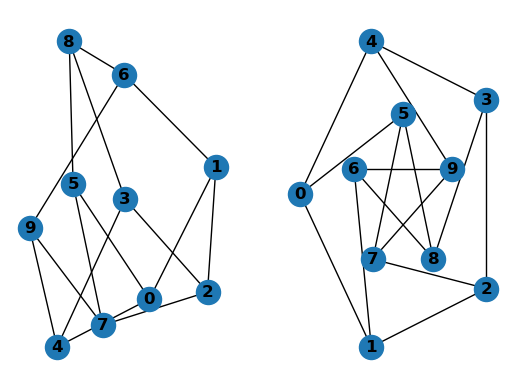

In [3]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [4]:
graph = nx.Graph()

graph.add_node(1, number=True)
graph.add_node(2, number=False)
graph.add_node(3, number=False)
graph.add_edge(1, 2, foo="bar")
graph.add_edge(1, 3, foo="boof")

graph.add_node(4, number=True)
graph.add_node(5, number=False)
graph.add_node(6, number=False)
graph.add_edge(4, 5, foo="foob")
graph.add_edge(4, 6, foo="rab")

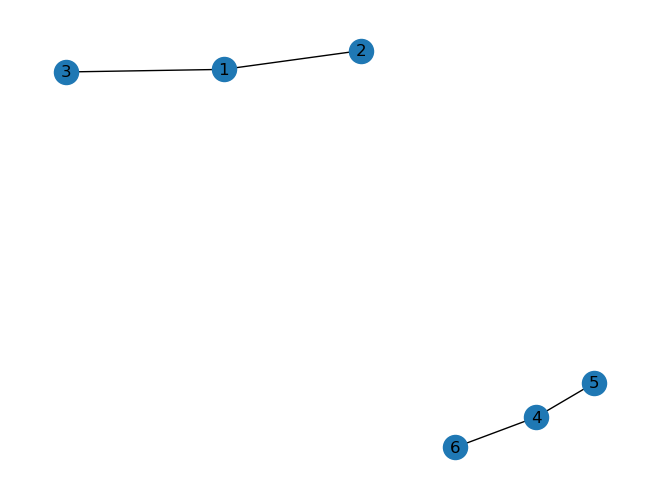

In [5]:
nx.draw(graph, with_labels=True)

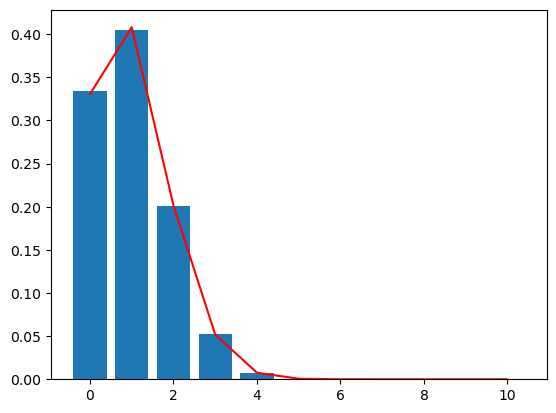

In [6]:
def prob(i, N, m):
    return math.comb(N, i) * math.comb(N-i, 2*(m - i)) * math.comb(2*(m - i), m-i) / math.comb(N, m)**2

N = 100
m = 10
num_samples = 1e5
initial_set = list(range(N))
possible_i = list(range(max(0, 2*m - N), m+1))
samples = [len(set(np.random.choice(initial_set, m, replace=False)).intersection(set(np.random.choice(initial_set, m, replace=False)))) for _ in range(int(num_samples))]
heights = [len([x for x in samples if x==i])/num_samples for i in possible_i]
probs = [prob(i, N, m) for i in possible_i]
plt.bar(possible_i, heights)
plt.plot(possible_i, probs, 'r')